# Flux surface

In [13]:
R0 = 6.2 * u.m

<Quantity 6.2 m>

In [30]:
plasmaboundaries.ITER

{'aspect_ratio': 0.32, 'A': -0.155, 'elongation': 1.7, 'triangularity': 0.33}

In [36]:
NSTX_PARAMS = dict(
    #     R0 = 0.8 * u.m,
    #     a0 = 0.64 * u.m,
    triangularity=0.3,
    elongation=1.7,
    aspect_ratio=0.3,
    A=-0.144,
)

{'triangularity': 0.3, 'elongation': 1.7, 'aspect_ratio': 0.3, 'A': -0.144}

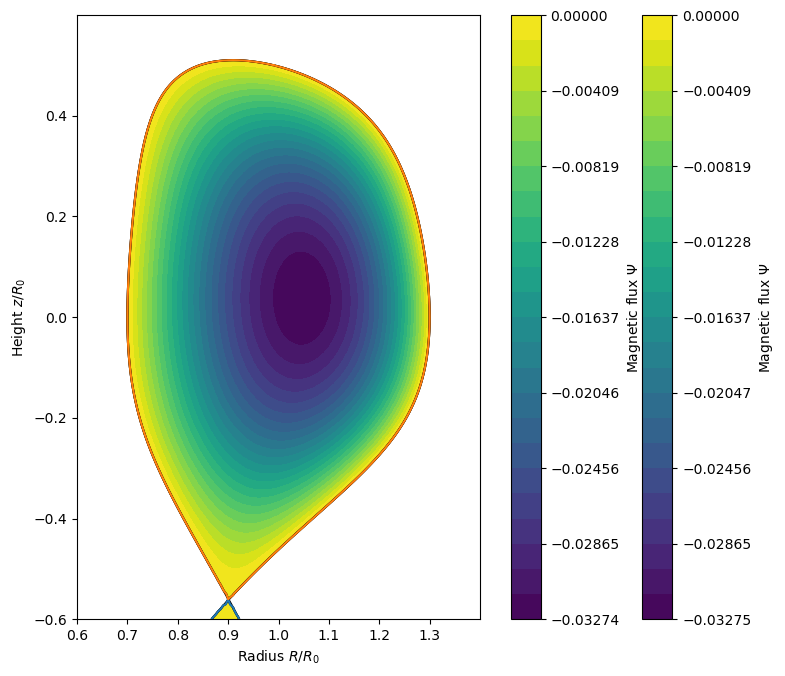

ValueError: Could not find contour for psi = 0 (len(contours)=2)

In [37]:
import plasmaboundaries

from plasmapy.plasma.symbolicequilibrium import SymbolicEquilibrium

params = plasmaboundaries.ITER.copy()
params = NSTX_PARAMS
assert params["triangularity"] <= 0.841  # for convex plasma surfaces
eq = SymbolicEquilibrium(**params, B0=5.2, config="single-null")
ax = eq.plot((0.6, 1.4, 0.001), (-0.6, 0.6, 0.001), vmax=-0)
for psi_value in [0, -0.01, -0.02]:
    fs = eq.get_flux_surface(psi_value)
    fs.plot(ax, B=True, n=True)

## On a grid

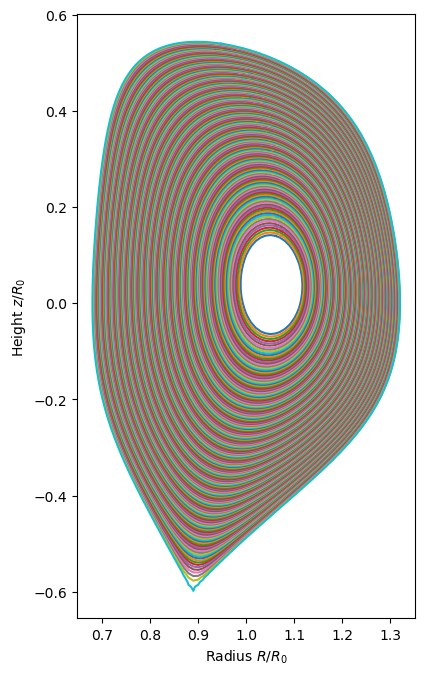

In [6]:
levels = np.linspace(-0.03556, 0, 200)
surfaces = [eq.get_flux_surface(level) for level in levels]

# ax = eq.plot()
ax = None
for fs in surfaces:
    ax = fs.plot(ax, legend=False)

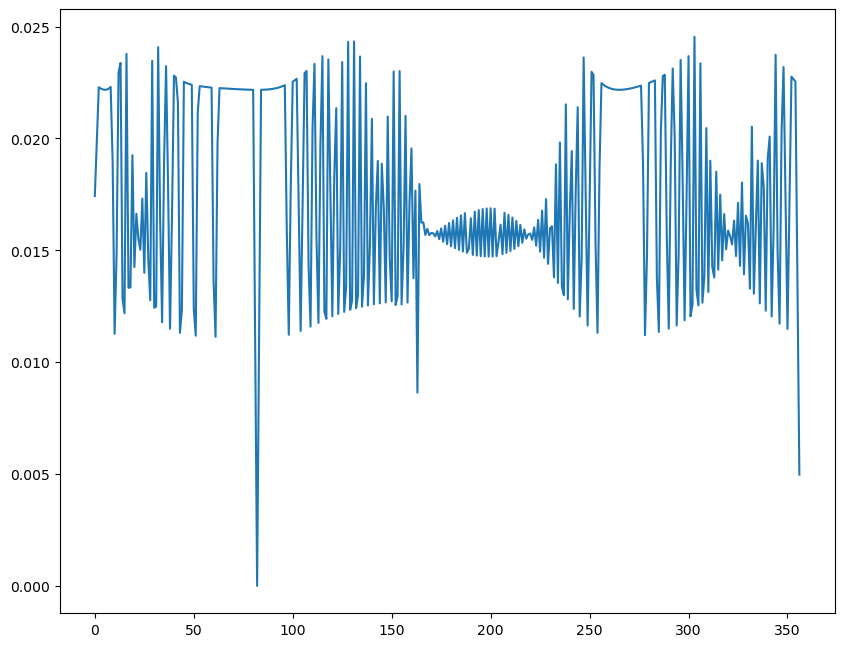

In [7]:
plt.plot(fs.theta)

/usr/lib/python3.9/site-packages/numpy/lib/function_base.py:1073: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/lib/python3.9/site-packages/numpy/lib/function_base.py:1075: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/lib/python3.9/site-packages/numpy/lib/function_base.py:1081: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


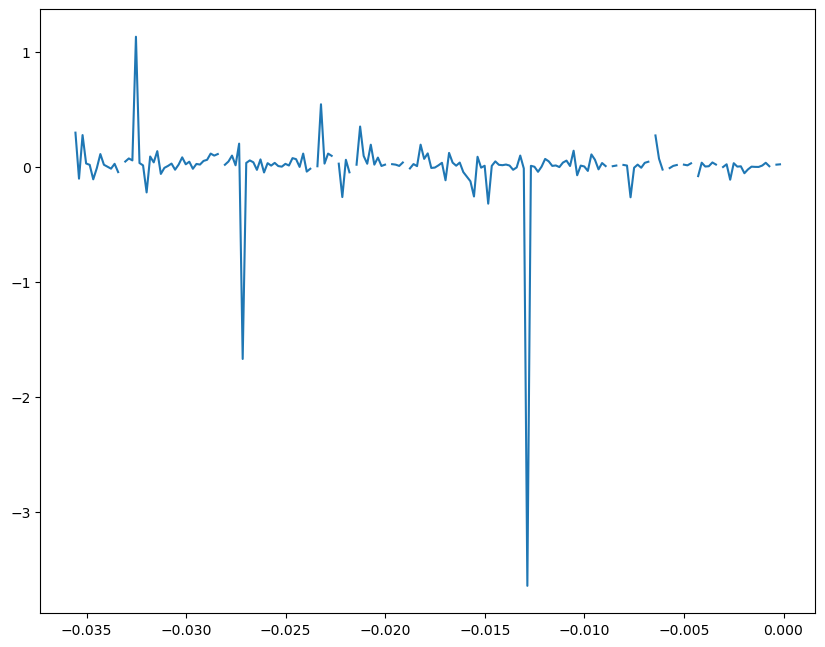

In [8]:
def dot_products():
    for fs in surfaces:
        dthetadR = np.gradient(fs.theta, fs.R)
        dthetadZ = np.gradient(fs.theta, fs.Z)
        dot_product = fs.Brvals * dthetadR + fs.Bzvals * dthetadZ
        yield fs.flux_surface_average(dot_product)


plt.plot(levels, list(dot_products()))

## One particular surface

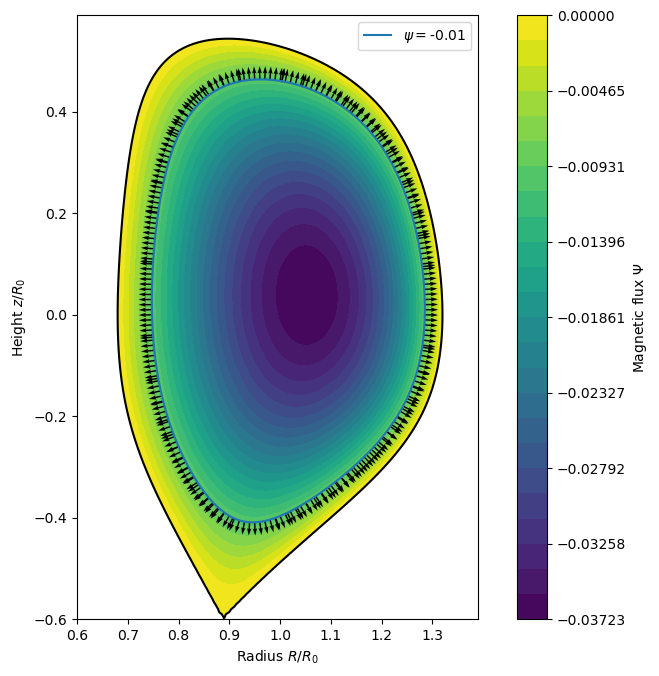

In [9]:
ax = eq.plot()
fs = eq.get_flux_surface(-0.01)
fs.plot(ax, n=True);

In [10]:
fs.trapped_fraction()

0.5179670516625869